In [20]:
import torch
# from gpt import GPT
import  gpt_scheduled_sampling as sampling
import trainer as trainer
from utility_functions import get_batch, decode_characters
import ast
import numpy as np
from itertools import product
import matplotlib.pyplot as plt

In [2]:
with open('../corpora/vocab_train.txt', 'r', encoding='utf-8') as f:
    vocab = eval(f.read())

with open('../corpora/indices_text.txt', 'r') as f:
    train_dataset = f.read()
with open('../corpora/indices_text_valid.txt', 'r') as f:
    validation_set = f.read()

train_dataset = ast.literal_eval(train_dataset)
validation_set = ast.literal_eval(validation_set)
device = 'cpu'
vocab_size = len(vocab)

In [25]:
import json
with open('../corpora/vocab_best.json', 'r', encoding='utf-8') as f:
    vocab = json.load(f)

with open('../corpora/Shakespeare_1st_merge_train.txt', 'r') as f:
    train_dataset = f.read()
with open('../corpora/Shakespeare_1st_merge_valid.txt', 'r') as f:
    validation_set = f.read()

train_dataset = ast.literal_eval(train_dataset)
validation_set = ast.literal_eval(validation_set)
device = 'cpu'
vocab_size = len(vocab)

In [7]:
class GPTConfig:
    def __init__(self, vocab_size, **kwargs):
        self.vocab_size = vocab_size
        for key, value in kwargs.items():
            setattr(self, key, value)


In [6]:
#Define hyperparameter grid
param_grid = {
    'n_layer': [4, 8],
    'n_head': [2, 4],
    'n_embd': [128, 256],
    'learning_rate': [1e-3, 1e-4],
    'batch_size': [16, 32]
}

# Generate all combinations
keys, values = zip(*param_grid.items())
experiments = [dict(zip(keys, v)) for v in product(*values)]


In [ ]:
results = []

for i, params in enumerate(experiments):
    print("_____________________________________________")
    print(f"Running experiment {i+1}/{len(experiments)} with params: {params}")
    config = GPTConfig(
        vocab_size=vocab_size,
        n_layer=params['n_layer'],
        n_head=params['n_head'],
        n_embd=params['n_embd'],
        embd_pdrop=0.1,
        resid_pdrop=0.1,
        attn_pdrop=0.1,
        dropout=0.1,
        compile=True,
        device=device,
        num_workers=0,
        max_iters=2e4,
        batch_size=params['batch_size'],
        block_size=64,
        learning_rate=params['learning_rate'],
        betas=(0.9, 0.95),
        weight_decay=1e-1,
        grad_norm_clip=1.0
    )
    
    epochs = 3
    train_steps = 1200  

    model = sampling.GPT(config=config, device=device)
    exp_trainer = trainer.Trainer(model, train_dataset, vocab, device, val_dataset=validation_set)
    loss, perplexities = exp_trainer.run(epochs, train_steps, config.batch_size, config.block_size)
    final_perplexity = perplexities[-1] if perplexities else None
    results.append({'params': params, 'final_perplexity': final_perplexity})
    #wrize results to file after each experiment
    with open('experiment_results.txt', 'a') as f:
        f.write(f"Params: {params}, Final Perplexity: {final_perplexity}\n")

# Print sorted results
results = sorted(results, key=lambda x: x['final_perplexity'] if x['final_perplexity'] is not None else float('inf'))
for res in results:
    print(f"Params: {res['params']}, Final Perplexity: {res['final_perplexity']}")

#Use best config for final training
best_params = results[0]['params']

In [26]:
config = GPTConfig(
    vocab_size=vocab_size,
    n_layer=4,
    n_head=2,
    n_embd=256,
    embd_pdrop=0.1,
    resid_pdrop=0.1,
    attn_pdrop=0.1,
    dropout=0.1,
    compile=True,
    device=device,
    num_workers=0,
    max_iters=2e4,
    batch_size=16,
    block_size=64,
    learning_rate=0.001,
    betas=(0.9, 0.95),
    weight_decay=1e-1,
    grad_norm_clip=1.0
)

print(vocab_size, "ln: ", np.log(vocab_size))
our_gpt = sampling.GPT(config=config, device=device)

our_trainer = trainer.Trainer(our_gpt, train_dataset, vocab, device, val_dataset=validation_set)
epochs = 12
train_steps = 1000

xbatch = torch.tensor([[0]], dtype=torch.long).to(device)
loss, val_loss, perplexities = our_trainer.run(epochs, train_steps, config.batch_size, config.block_size)
generated = our_gpt.generate(xbatch, 100, 0.8, True, 20)
generated = generated[0].tolist()
decoded = decode_characters(generated, vocab)
print(decoded)


840 ln:  6.733401891837359
Number of parameters: 3.39M
##################################################################
Epoch 1/12


Validation Loss: 4.5904, Perplexity: 98.53
Generated text: 
vas, and danger to the maid, and und the devies of the duncan to him of the moish than the possion of the sun . hamlet i will be none to the ling of the very lik, and the matter . hamlet and so much i have no more than the very mistress of the . iago come, that will . the ven of the world madam ? i have a stra
##################################################################
Epoch 2/12


Validation Loss: 4.2008, Perplexity: 66.74
Generated text: 
valike the law  what dost thou got ? horatio a friend  ah, if thou a little and let him be lieus, a little of the day, but not of my dd, if the worth, 'twere cleopatra 'tis l . first murderer mecap, my lord . bassanio this is the save the general of them ; and it is the cabellown
##################################################################
Epoch 3/12


Validation Loss: 4.0771, Perplexity: 58.97
Generated text: 
valued . enter a servant attendants messenger o, and attendants duncan you may not the world, and attendants . enter romeo and ink of the emplous hence, with his love of the court lower than my lord . enter salarino, and attendants of your lord, and o, and put them by the free or or the ching with his body 
##################################################################
Epoch 4/12


Validation Loss: 4.0304, Perplexity: 56.28
Generated text: 
vantage my stern  how she 'twixt that 'tis well . i pray you, sir : he is a vile of that . exeunt scene ii . a room in the casten, and attendants of the same . enter a daniel, and attendants enter dolabella, and attendant, and attendants ons of cousin and dolabella tarry
##################################################################
Epoch 5/12


Validation Loss: 4.0096, Perplexity: 55.13
Generated text: 
vail'd . king claudius what can it please you monstrous ? ither the dwell, and young in this revenge you of my heart ? queen gertrude alack, and he is assuray and i must be made of much work ; and when they are not contariment . come, my good lord . hamlet i think that they have a pit on the dkward of this is the stampending on the 
##################################################################
Epoch 6/12


Validation Loss: 3.9538, Perplexity: 52.13
Generated text: 
vriant to do thine playering in his hand . exeunt murderer stand  mark antony will ebetter soldier . eros and lepidus metell, ho  mark antony farewell, and some there is weep ; we'll hear all . mark antony and titania . exeunt scene vii . alas, and attendants . enter octavius caesar, and lucius brutus, and warm 
##################################################################
Epoch 7/12


Validation Loss: 3.9154, Perplexity: 50.17
Generated text: 
v. pompey, and bring him down ; for to his myself . pompey ah, i am well forsworn to his body ; and to mark you have made of my food . menas ay, good night, thou hast thou keep that we must leave the or no . pompey . pompey aside to menas the mouth of day . exeunt mark antony, lepidus mark antony with music 
##################################################################
Epoch 8/12


Validation Loss: 3.9220, Perplexity: 50.50
Generated text: 
value . bassanio thou but uld, thou turn'st it is too much to spend the dgment : i have not knows my joured, a very thing i have been set him : yet i have a hangliving, for one of these thief is myself ; and, proceed to the haste, that under sail and tree, that you would have been left it of 
##################################################################
Epoch 9/12


Validation Loss: 3.9493, Perplexity: 51.90
Generated text: 
valiant soldiers he between this dismakes ; and pyramus on, and that great meltry, the high-gates the arm and historigign, the grief that are action of each . will we weep your bosom and daughter to your consciences to your daughter, to make athens the moor : 
##################################################################
Epoch 10/12


Validation Loss: 3.9333, Perplexity: 51.08
Generated text: 
vulgar . exeunt scene ii . another part of the monument . enter lady macbeth lady macduff why, then, dull  son to my bond : i have a wished : the subdue of a slain, to give ounded up and down  lady macduff is already ; it is my mother a wide ; and it was a daughter'd, that my father may made her forth 
##################################################################
Epoch 11/12


Validation Loss: 3.9635, Perplexity: 52.64
Generated text: 
vautual natural as, nor no authorough in the continual state, i am not twas, my lord . mark antony you shall not be aught in demetrius . lepidus sir ; octavius caesar since you have heard me, tempertaining the present whaten have done a any thing that you est for his friend : you do not worse to tell us the god
##################################################################
Epoch 12/12


Validation Loss: 3.9986, Perplexity: 54.52


Generated text: 
vain, to grow cold to assailing delight . there was more line in these flood, and very good remain in do begins . i have spotted myself . duncan, i can tell you cut my made bassanio for my spirits that i can king's sight : i have not prosperity myself in mirth, and bring the virtues 
valour of your corpse, your mother's house ; your other habit would have had generace my father, for aught of bring, which had been pindarus should be what they can betrablood for ? i am yourself and say it is . king claudius o, it is too great for him . hamlet gog, i am hard, as you do me now to my country . lord 


In [36]:
# Save the model
torch.save(our_gpt.state_dict(), "gpt_scheduled_sampling_model.pth")

In [30]:
perplexities

[np.float64(98.53017480545783),
 np.float64(66.73787982099921),
 np.float64(58.974220660413756),
 np.float64(56.28349013892101),
 np.float64(55.125224989413034),
 np.float64(52.130859475445824),
 np.float64(50.167762956680555),
 np.float64(50.501592787819035),
 np.float64(51.90021136075556),
 np.float64(51.075729885983655),
 np.float64(52.64072611150181),
 np.float64(54.523706702672854)]

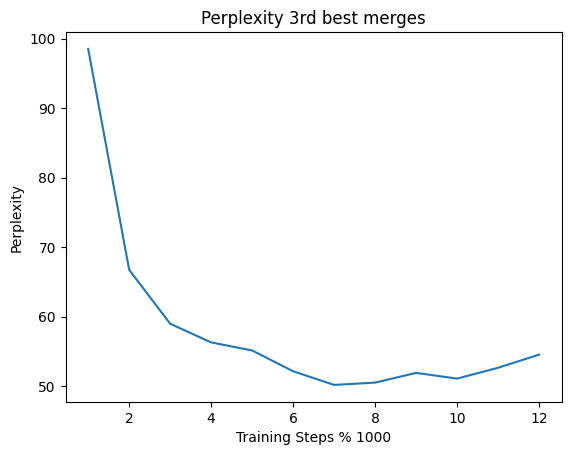

In [27]:
# Plot perplexity
y = np.arange(1, len(perplexities)+1)
plt.plot(y, perplexities)
plt.xlabel('Training Steps % 1000')
plt.ylabel('Perplexity')
plt.title('Perplexity 3rd best merges')
plt.savefig('perplexity_scheduled_sampling.png')
plt.show()

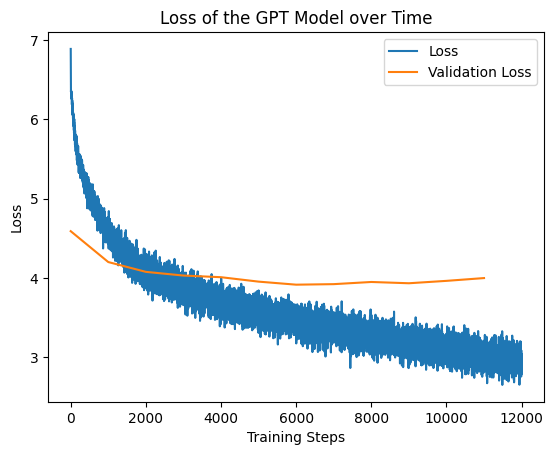

In [28]:
y = np.arange(1, len(loss)+1)
plt.plot(y, loss, label='Loss')
# Plot val_loss every 1000 steps
val_x = np.arange(len(val_loss)) * 1000
plt.plot(val_x, val_loss, label='Validation Loss')
plt.xlabel('Training Steps')
plt.legend()
plt.ylabel('Loss')
plt.title('Loss of the GPT Model over Time')
plt.savefig('loss_scheduled sampling.png')
plt.show()

In [ ]:
with open('gpz_model.txt', 'w') as f:
    f.write(decoded)